In [1]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [5]:
!unzip -uq "/content/gdrive/MyDrive/Animal_prediction/Interesting.zip" -d "/content/gdrive/MyDrive/Animal_prediction"

In [10]:
dataset_path = "/content/gdrive/MyDrive/Animal_prediction/output_folder/Interesting Data"

In [11]:
# Load the image data and labels
images = []
labels = []
class_names = os.listdir(dataset_path)
num_classes = len(class_names)


In [12]:
for i, class_name in enumerate(class_names):
    class_path = os.path.join(dataset_path, class_name)
    for image_name in os.listdir(class_path):
        image_path = os.path.join(class_path, image_name)
        image = cv2.imread(image_path)
        image = cv2.resize(image, (224, 224))  # Resize the image to a common size
        images.append(image)
        labels.append(i)

In [13]:
# Convert the data to NumPy arrays
images = np.array(images)
labels = np.array(labels)


In [14]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

In [15]:
# Normalize the pixel values to the range of 0-1
X_train = X_train / 255.0
X_test = X_test / 255.0

In [16]:
# Define the model architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(num_classes, activation='softmax')
])

In [17]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [18]:
# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
3/3 [==============================] - 7s 2s/step - loss: 5.4534 - accuracy: 0.0746 - val_loss: 5.2783 - val_accuracy: 0.0000e+00
Epoch 2/10
3/3 [==============================] - 7s 2s/step - loss: 4.3581 - accuracy: 0.0746 - val_loss: 3.2328 - val_accuracy: 0.0588
Epoch 3/10
3/3 [==============================] - 6s 2s/step - loss: 2.6744 - accuracy: 0.1791 - val_loss: 2.6857 - val_accuracy: 0.0588
Epoch 4/10
3/3 [==============================] - 6s 2s/step - loss: 2.3302 - accuracy: 0.2985 - val_loss: 2.7173 - val_accuracy: 0.0588
Epoch 5/10
3/3 [==============================] - 6s 2s/step - loss: 2.0104 - accuracy: 0.3582 - val_loss: 2.6050 - val_accuracy: 0.1765
Epoch 6/10
3/3 [==============================] - 5s 2s/step - loss: 1.5467 - accuracy: 0.8060 - val_loss: 2.9200 - val_accuracy: 0.0000e+00
Epoch 7/10
3/3 [==============================] - 7s 2s/step - loss: 1.0811 - accuracy: 0.8657 - val_loss: 3.2515 - val_accuracy: 0.0588
Epoch 8/10
3/3 [=================

In [19]:
# Evaluate the model
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

1/1 [==============================] - 0s 471ms/step


In [20]:
# Print classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         2
           3       0.25      1.00      0.40         1
           4       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         2
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         2
          10       0.00      0.00      0.00         1
          11       0.00      0.00      0.00         1
          12       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         1
          14       0.00      0.00      0.00         1

    accuracy                           0.12        17
   macro avg       0.09      0.11      0.08        17
weighted avg       0.13      0.12      0.10        17



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

In [46]:
import cv2
import numpy as np


In [47]:
# Preprocess the image
image = cv2.imread("/content/gdrive/MyDrive/Animal_prediction/output_folder/Interesting Data/Hippo/hippo-dress.jpg")
image = cv2.resize(image, (224, 224))
image = image / 255.0

In [48]:
# Reshape the image
image = np.reshape(image, (1, 224, 224, 3))


In [49]:
# Make predictions using the model
prediction = model.predict(image)
predicted_class_index = np.argmax(prediction)

1/1 [==============================] - 0s 44ms/step


In [50]:
# Retrieve the predicted class label
predicted_class = class_names[predicted_class_index]

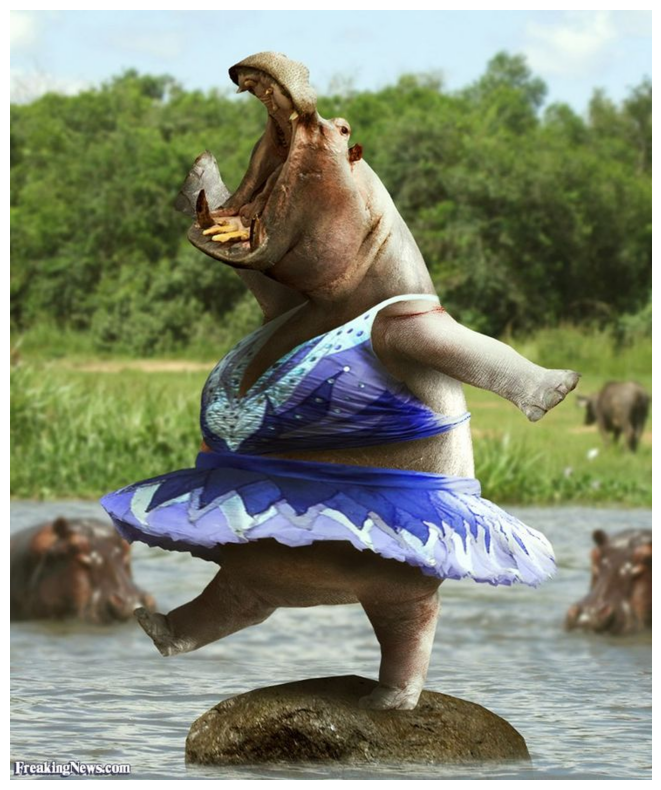

In [51]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

image = cv2.imread("/content/gdrive/MyDrive/Animal_prediction/output_folder/Interesting Data/Hippo/hippo-dress.jpg")
height, width = image.shape[:2]
resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

fig = plt.gcf()
fig.set_size_inches(18, 10)
plt.axis("off")
plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
plt.show()

In [52]:
# Print the predicted class
print("Predicted class:", predicted_class)

Predicted class: Hippo
